In [1]:
# import numerical libraries
import numpy as np
import glob
import h5py
import nibabel as nib
import os

# import machine learning libraries
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from skimage import io
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

import segmentation_models_3D as sm

2.8.0
Segmentation Models: using `tf.keras` framework.


In [4]:
# get all the file names for loading images

brats_dir = '/MICCAI_BraTS_2018_Data_Training/'
prefix = '/home/atom/Documents/datasets/brats' # Adam's Station

t2_list = sorted(glob.glob(local_dir + '/*/*t2.nii.gz'))
t1ce_list = sorted(glob.glob(local_dir + '/*/*t1ce.nii.gz'))
flair_list = sorted(glob.glob(local_dir + '/*/*flair.nii.gz'))
mask_list = sorted(glob.glob(local_dir + '/*/*seg.nii.gz'))

In [5]:
# save images into training folder with raw image and masked images
# instantiate the MinMax Scaling function
scaler = MinMaxScaler()

raw_img_mean = []
raw_img_std = []

class_weights = []

for img in range(len(t2_list)):
    print("Loading image and masks number: ", img)

    # load t2 and preprocess the data
    tmp_img_t2 = nib.load(t2_list[img]).get_fdata()
    tmp_img_t2 = scaler.fit_transform(tmp_img_t2.reshape(-1, tmp_img_t2.shape[-1])).reshape(tmp_img_t2.shape)
    
    # load t1ce and preprocess the data
    tmp_img_t1ce = nib.load(t1ce_list[img]).get_fdata()
    tmp_img_t1ce = scaler.fit_transform(tmp_img_t1ce.reshape(-1, tmp_img_t1ce.shape[-1])).reshape(tmp_img_t1ce.shape)
    
    # load flair and preprocess the data
    tmp_img_flair = nib.load(flair_list[img]).get_fdata()
    tmp_img_flair = scaler.fit_transform(tmp_img_flair.reshape(-1, tmp_img_flair.shape[-1])).reshape(tmp_img_flair.shape)

    # load mask 
    tmp_mask = nib.load(mask_list[img]).get_fdata()
    tmp_mask = tmp_mask.astype(np.uint8)
    tmp_mask[tmp_mask==4] = 3 # reassign value 4 to 3 

    combined_img = np.stack([tmp_img_flair, tmp_img_t1ce, tmp_img_t2], axis = 3)
    raw_imgs[img] = combined_img
    tmp_mask = to_categorical(tmp_mask, num_classes = 4)
    mask_imgs[img] = tmp_mask


Loading image and masks number:  0
Loading image and masks number:  1
Loading image and masks number:  2
Loading image and masks number:  3
Loading image and masks number:  4
Loading image and masks number:  5
Loading image and masks number:  6
Loading image and masks number:  7
Loading image and masks number:  8
Loading image and masks number:  9
Loading image and masks number:  10
Loading image and masks number:  11
Loading image and masks number:  12
Loading image and masks number:  13
Loading image and masks number:  14
Loading image and masks number:  15
Loading image and masks number:  16
Loading image and masks number:  17
Loading image and masks number:  18
Loading image and masks number:  19
Loading image and masks number:  20
Loading image and masks number:  21
Loading image and masks number:  22
Loading image and masks number:  23
Loading image and masks number:  24
Loading image and masks number:  25
Loading image and masks number:  26
Loading image and masks number:  27
Lo

NameError: name 'raw_imgs' is not defined

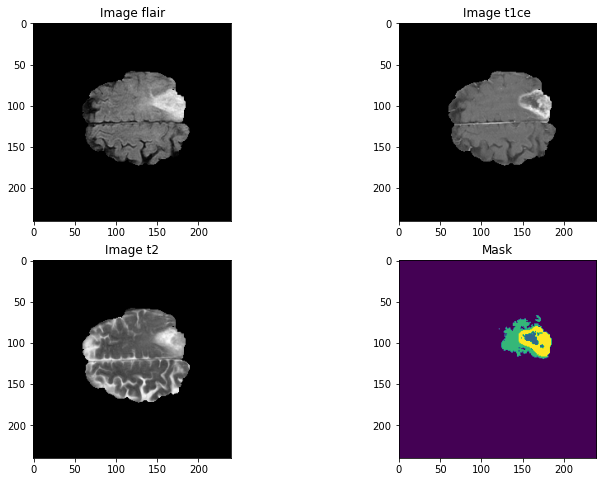

In [8]:
import matplotlib.pyplot as plt
import random

test_img = raw_imgs[120]
test_mask = np.argmax(mask_imgs[120],axis = -1)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [43]:
import pandas as pd

def get_class_weights(img_list, columns, n_classes):
    # Function get_class_weights calculates the weight of the labels
    # in the masked image sets.

    # img_list : List data structure; list of the masked images
    # columns: column of labels
    df = pd.DataFrame(columns = columns)
    for img in img_list:
        _, counts = np.unique(img, return_counts = True)
        zipped = zip(columns, counts)
        counts_dict = dict(zipped)

        df = df.append(counts_dict, ignore_index=True)
    
    label_list = []
    for idx in columns:
        label_list.append(df[str(idx)].sum())

    total_labels = sum(label_list)
    
    wt_list = []
    for idx in range(len(label_list)):
        wt_list.append(round((total_labels/(n_classes*label_list[idx])), 2))

    return wt_list

In [6]:
from sklearn.utils import class_weight

x_train, y_train, x_test, y_test = train_test_split(raw_imgs,mask_imgs, test_size = 0.2,shuffle=42)

class_weights = get_class_weights()

AttributeError: 'list' object has no attribute 'shape'